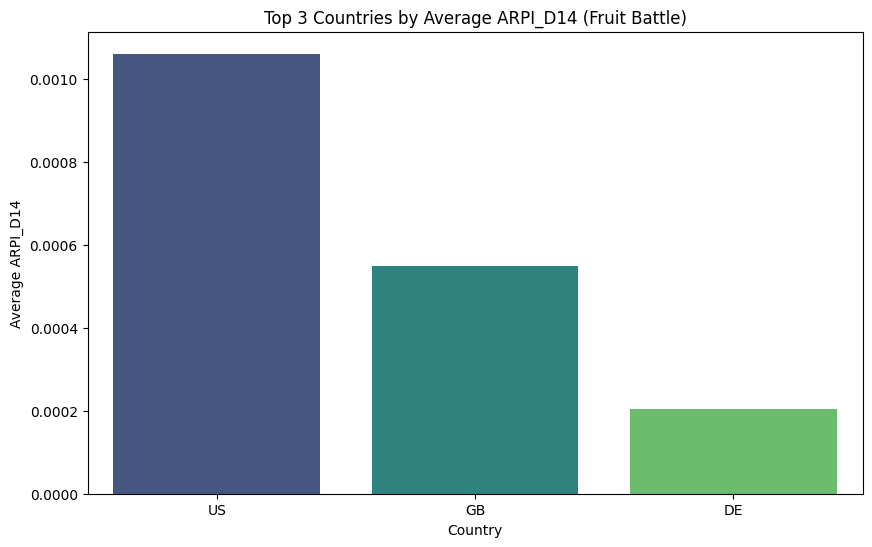

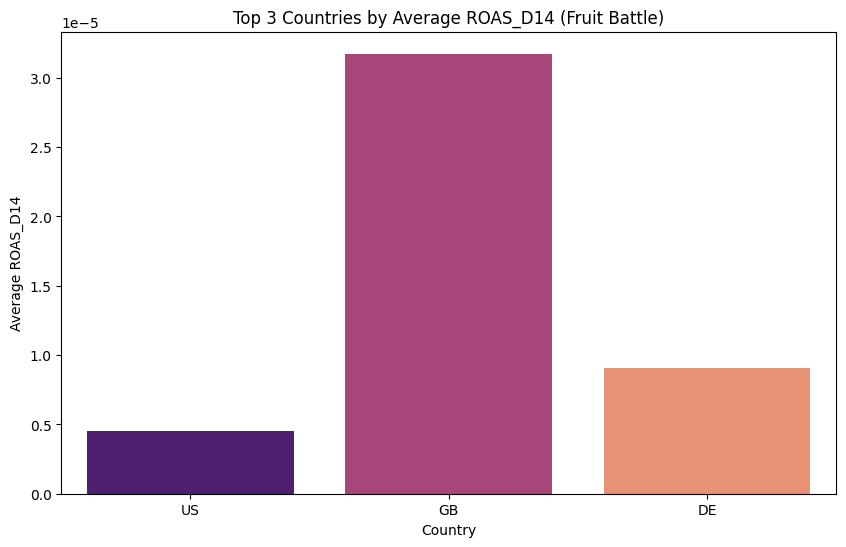

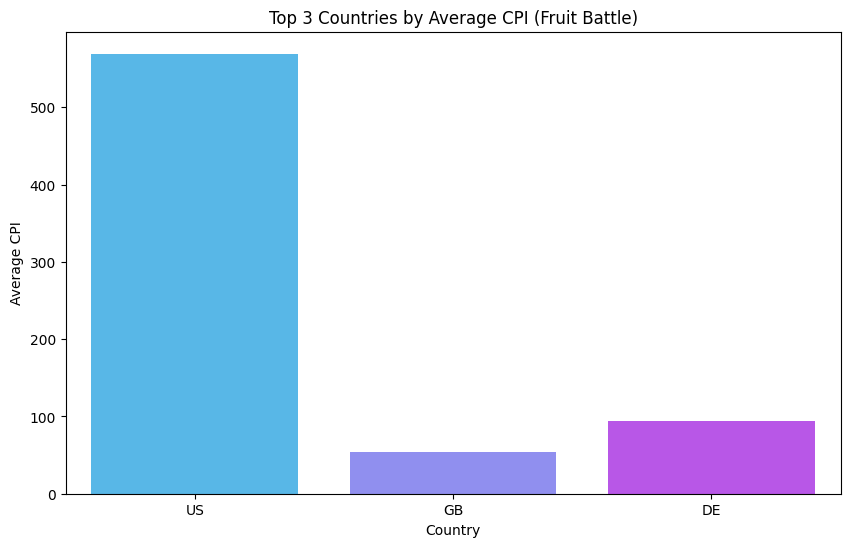

In [17]:
# Fruit Battle Country Analysis - ARPI_D14

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load summary data
summary = pd.read_csv('summary.csv')
summary.head()

# Filter for Fruit Battle and date range
mask = (
        (summary['client'] == 'fruit_battle') &
        (summary['year'] == 2021) &
        (summary['month'] == 12) &
        (summary['day'] >= 1) & (summary['day'] <= 15)
)
fb = summary[mask]

fb.head()


# Group by country, calculate average ARPI_D14 and other metrics
country_stats = (
    fb.groupby('country')
    .agg(
        avg_arpi_d14=('arpi_d14', 'mean'),
        total_ad_spend=('ad_spend', 'sum'),
        total_installs=('installs', 'sum'),
        avg_cpi=('cpi', 'mean'),
        avg_roas_d14=('roas_d14', 'mean')
    )
    .reset_index()
    .sort_values('avg_arpi_d14', ascending=False)
)

# Top 3 countries by ARPI_D14
top3 = country_stats.head(3)

# Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(data=top3, x='country', y='avg_arpi_d14', hue='country', palette='viridis', legend=False)
plt.title('Top 3 Countries by Average ARPI_D14 (Fruit Battle)')
plt.ylabel('Average ARPI_D14')
plt.xlabel('Country')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=top3, x='country', y='avg_roas_d14', hue='country', palette='magma', legend=False)
plt.title('Top 3 Countries by Average ROAS_D14 (Fruit Battle)')
plt.ylabel('Average ROAS_D14')
plt.xlabel('Country')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=top3, x='country', y='avg_cpi', hue='country', palette='cool', legend=False)
plt.title('Top 3 Countries by Average CPI (Fruit Battle)')
plt.ylabel('Average CPI')
plt.xlabel('Country')
plt.show()